<span style="font-size:45px;">Visualization</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


<span style="font-size: 30px;">1.Sector-wise Rise Analysis</span>

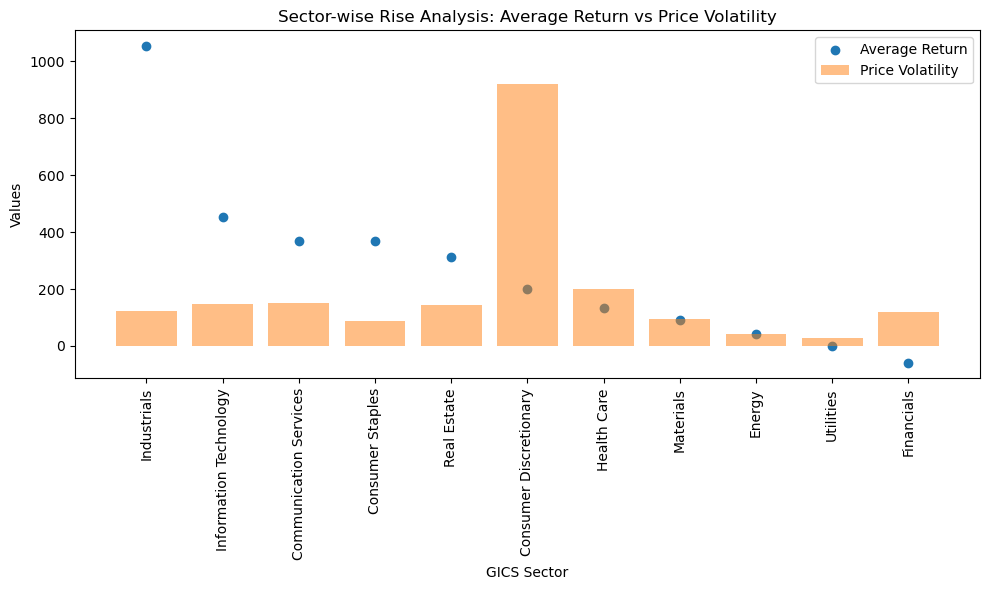

In [2]:
csv_file_path = '/Users/aringhorui/Documents/BDMS/Analysis1SectorwiseRiseAnalysis.csv/part-00000-0214e457-cce5-423c-b4f5-c9b7d707504f-c000.csv'  
sector_analysis_df = pd.read_csv(csv_file_path)
plt.figure(figsize=(10, 6))
plt.scatter(sector_analysis_df["GICS_Sector"], sector_analysis_df["Average_Return"], label='Average Return')
plt.bar(sector_analysis_df["GICS_Sector"], sector_analysis_df["Price_Volatility"], alpha=0.5, label='Price Volatility')
plt.xlabel('GICS Sector')
plt.ylabel('Values')
plt.title('Sector-wise Rise Analysis: Average Return vs Price Volatility')
plt.xticks(rotation=90)  
plt.legend()
plt.tight_layout()
plt.show()

<span style="font-size: 30px;">2.Market dominator per sector</span>

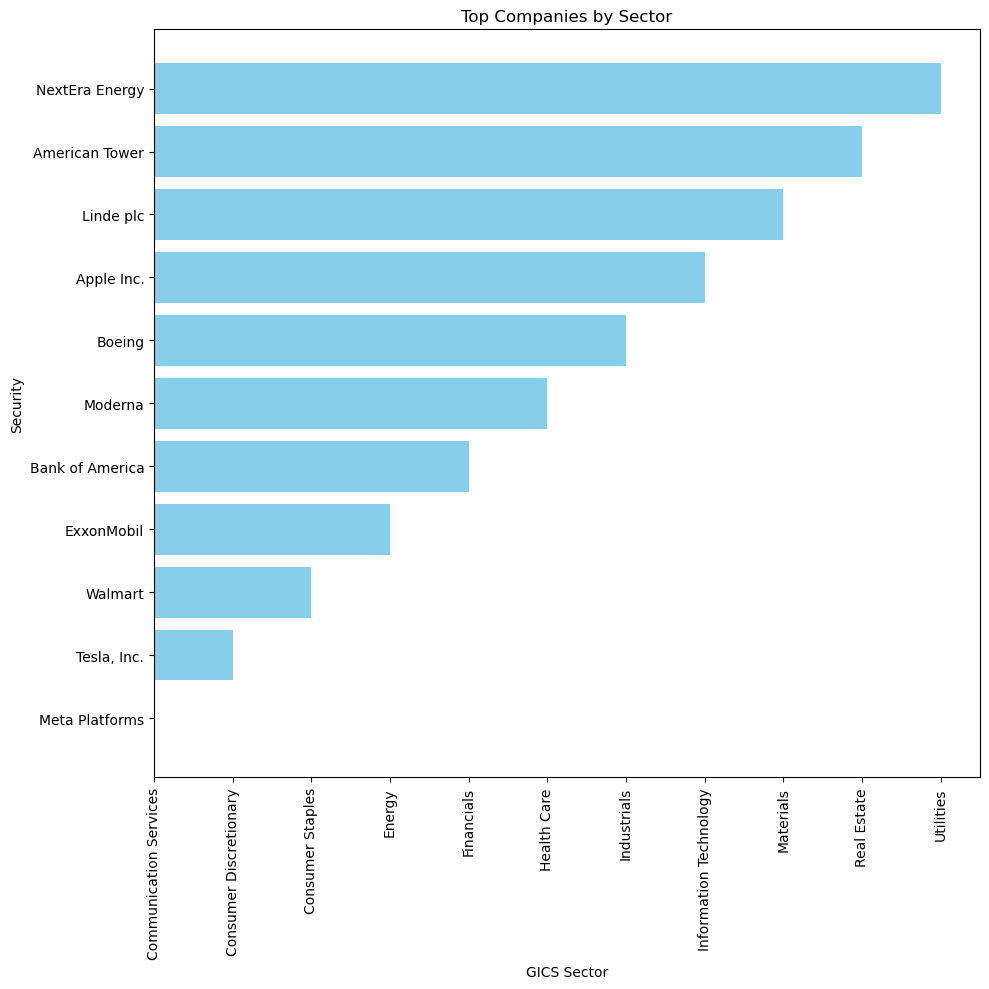

In [5]:
data = pd.read_csv('/Users/aringhorui/Documents/BDMS/Analysis2Marketdominatorpersector.csv/part-00000-6001ede2-528d-483f-b1b7-951946a51134-c000.csv')
plt.figure(figsize=(10, 10))
plt.barh(data['Security'], data['GICS_Sector'], color='skyblue')
plt.title('Top Companies by Sector')
plt.xlabel('GICS Sector')
plt.xticks(rotation=90)
plt.ylabel('Security')
plt.tight_layout()
plt.show()

<span style="font-size: 30px;">3.Top Dividend Stock each Year</span>

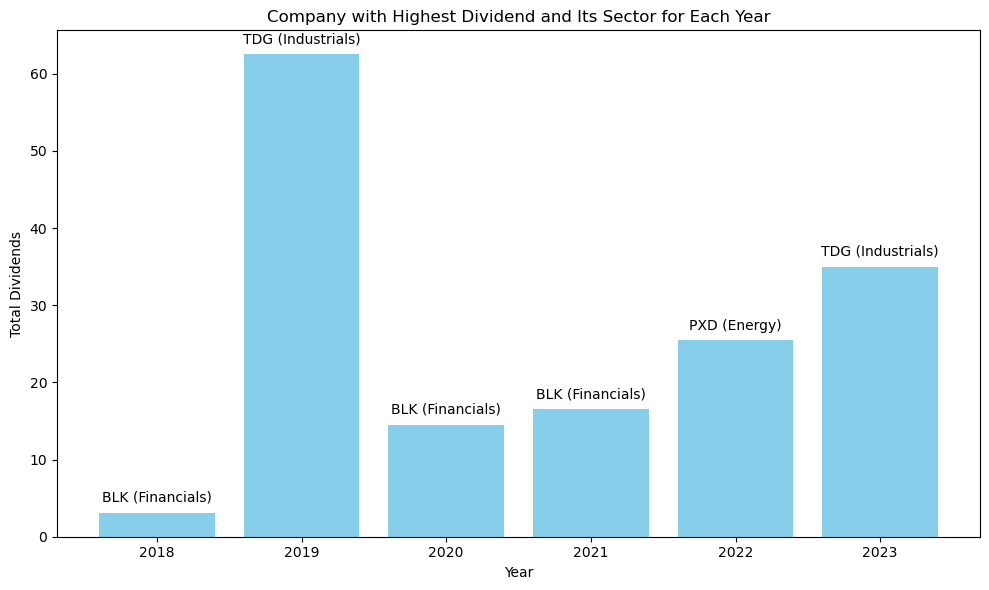

In [4]:
# Path to the CSV file
csv_file_path = '/Users/aringhorui/Documents/BDMS/Analysis3TopDividendStockeachYear.csv/part-00000-c2c88c5d-9f33-4bec-9eba-bbfe11853b42-c000.csv'
data = pd.read_csv(csv_file_path)
data['TotalDividends'] = pd.to_numeric(data['TotalDividends'])
max_dividends = data.loc[data.groupby('Year')['TotalDividends'].idxmax()]
plt.figure(figsize=(10, 6))
plt.bar(max_dividends['Year'], max_dividends['TotalDividends'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Dividends')
plt.title('Company with Highest Dividend and Its Sector for Each Year')
plt.xticks(max_dividends['Year'])
plt.tight_layout()
for i, row in max_dividends.iterrows():
    plt.text(row['Year'], row['TotalDividends'] + 1, f"{row['Company']} ({row['GICS_Sector']})",
             ha='center', va='bottom', rotation=0)
plt.show()

<span style="font-size: 30px;">4.Company’s age VS its performance</span>

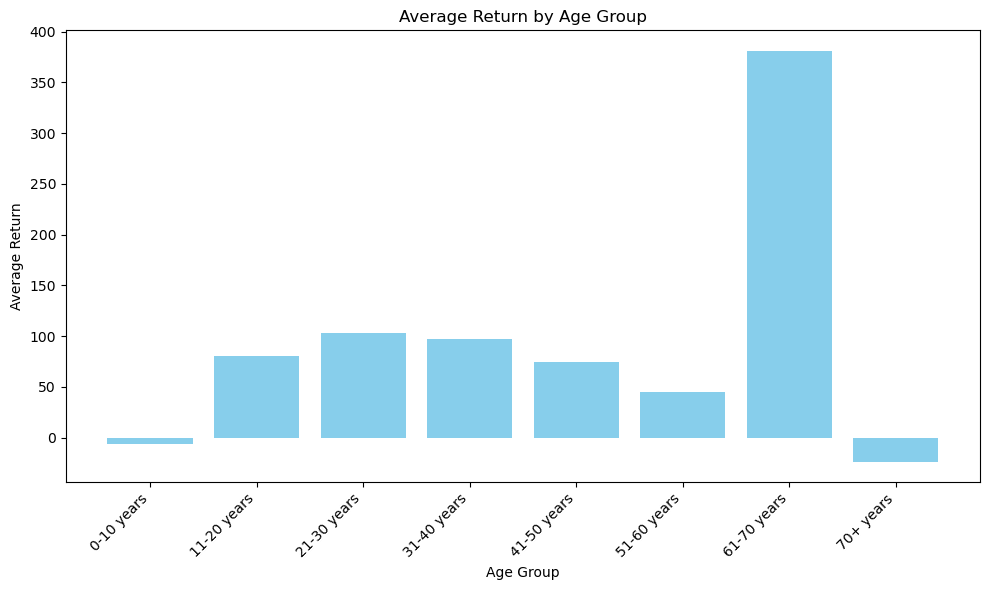

In [6]:
csv_file_path = '/Users/aringhorui/Documents/BDMS/Analysis4CompanyageVSitsperformance.csv/part-00000-c8bd19f5-b432-47a3-91ec-bd41b6efa4ff-c000.csv'
data = pd.read_csv(csv_file_path)
plt.figure(figsize=(10, 6))
plt.bar(data['AgeGroup'], data['Average_Return'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Average Return')
plt.title('Average Return by Age Group')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

<span style="font-size: 30px;">5.Yearly Performance Comparison Across Sectors</span>

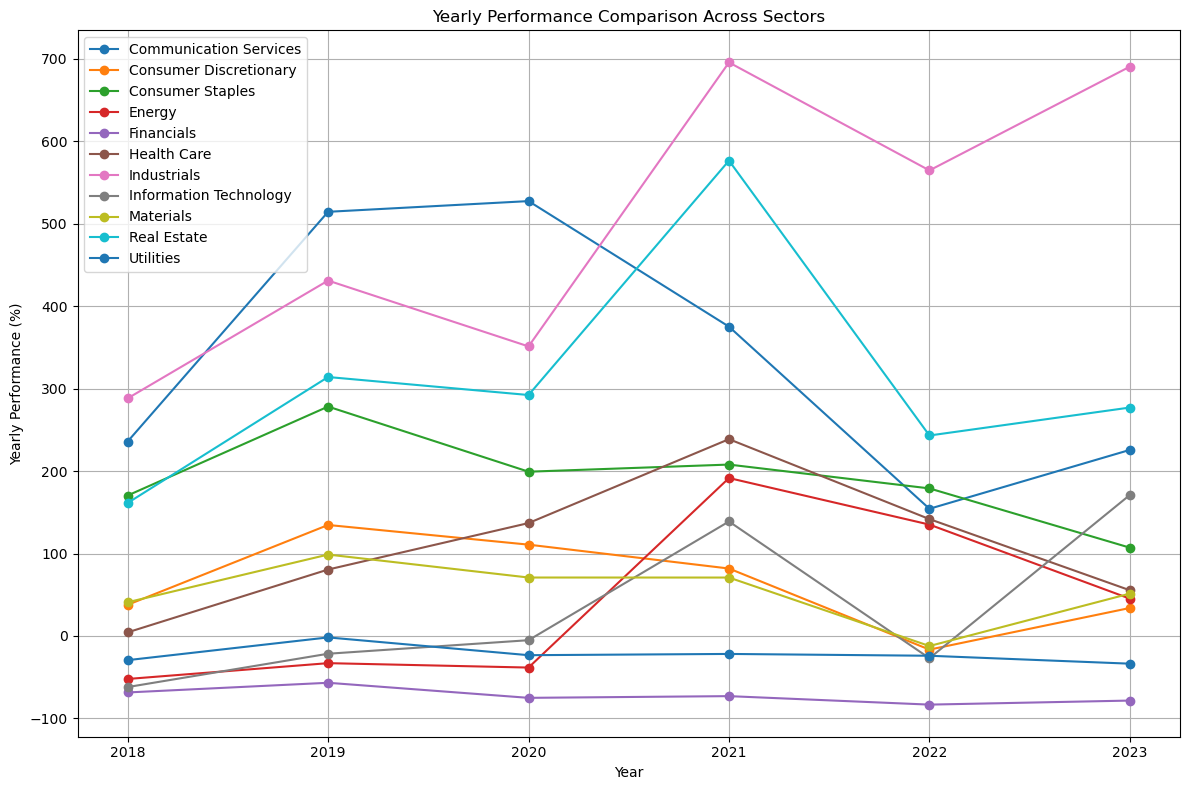

In [7]:
data = pd.read_csv('/Users/aringhorui/Documents/BDMS/Analysis5YearlyPerformanceComparisonAcrossSectors.csv/part-00000-d5f9223b-0cd9-45b3-914a-12171701014a-c000.csv')

# Pivot the data to prepare for plotting
pivot_data = data.pivot(index='Year', columns='GICS_Sector', values='Yearly_Performance')

# Plotting
plt.figure(figsize=(12, 8))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)

plt.title('Yearly Performance Comparison Across Sectors')
plt.xlabel('Year')
plt.ylabel('Yearly Performance (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="font-size: 30px;">6.Companies with stock split and their stock volume</span>

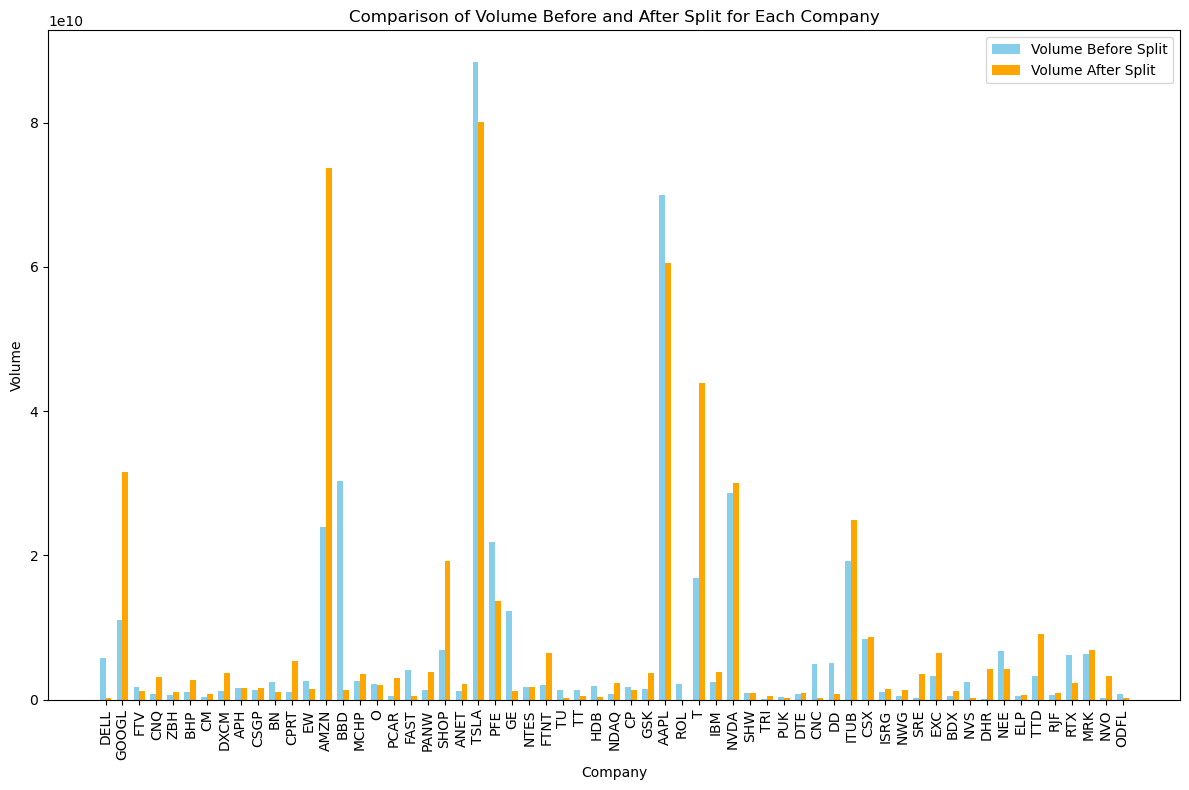

In [8]:
csv_file_path = '/Users/aringhorui/Documents/BDMS/Analysis6Companieswithstocksplit.csv/part-00000-016cd6c3-f5d8-4c91-9cc0-eaa87cbdafe6-c000.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(csv_file_path)

# Arrange data for plotting
companies = data['Company']
volume_before = data['Volume_Before_Split']
volume_after = data['Volume_After_Split']

# Setting the positions for bars
x = np.arange(len(companies))
width = 0.35

# Creating the double bar graph
plt.figure(figsize=(12, 8))

plt.bar(x - width/2, volume_before, width, label='Volume Before Split', color='skyblue')
plt.bar(x + width/2, volume_after, width, label='Volume After Split', color='orange')

plt.xlabel('Company')
plt.ylabel('Volume')
plt.title('Comparison of Volume Before and After Split for Each Company')
plt.xticks(x, companies, rotation='vertical')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

<span style="font-size: 30px;">7.Price Movement Patterns</span>

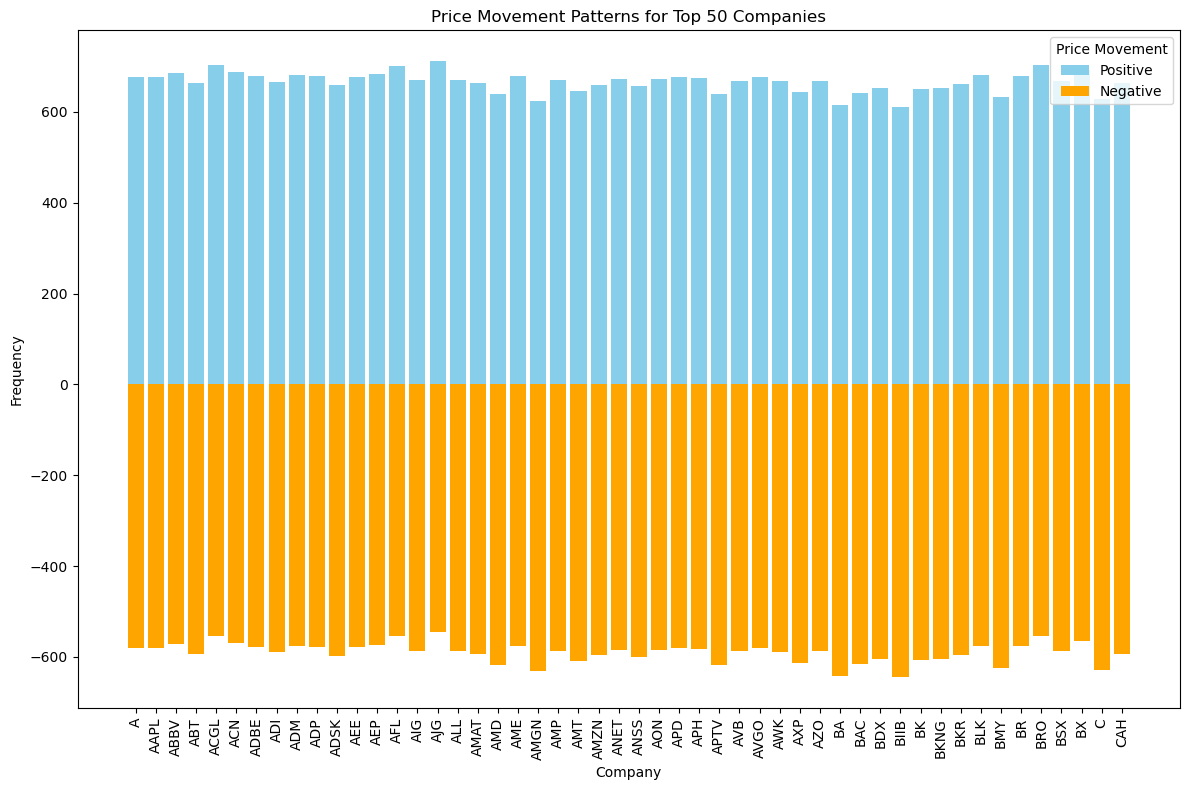

In [12]:
data = pd.read_csv('/Users/aringhorui/Documents/BDMS/Analysis7PriceMovementPatterns.csv/part-00000-c0c32d6a-1c5c-4c81-a18f-60c54598c49f-c000.csv')
company_freq = data.groupby('Company')['Frequency'].sum().reset_index()
top_50_companies = company_freq.nlargest(50, 'Frequency')['Company']
filtered_data = data[data['Company'].isin(top_50_companies)]
positive_data = filtered_data[filtered_data['Price_Movement'] == 'Positive']
negative_data = filtered_data[filtered_data['Price_Movement'] == 'Negative']
plt.figure(figsize=(12, 8))
plt.bar(positive_data['Company'], positive_data['Frequency'], color='skyblue', label='Positive')
plt.bar(negative_data['Company'], -negative_data['Frequency'], color='orange', label='Negative')
plt.title('Price Movement Patterns for Top 50 Companies')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.legend(title='Price Movement')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


 <span style="font-size: 30px;">8.Geographical Analysis</span>

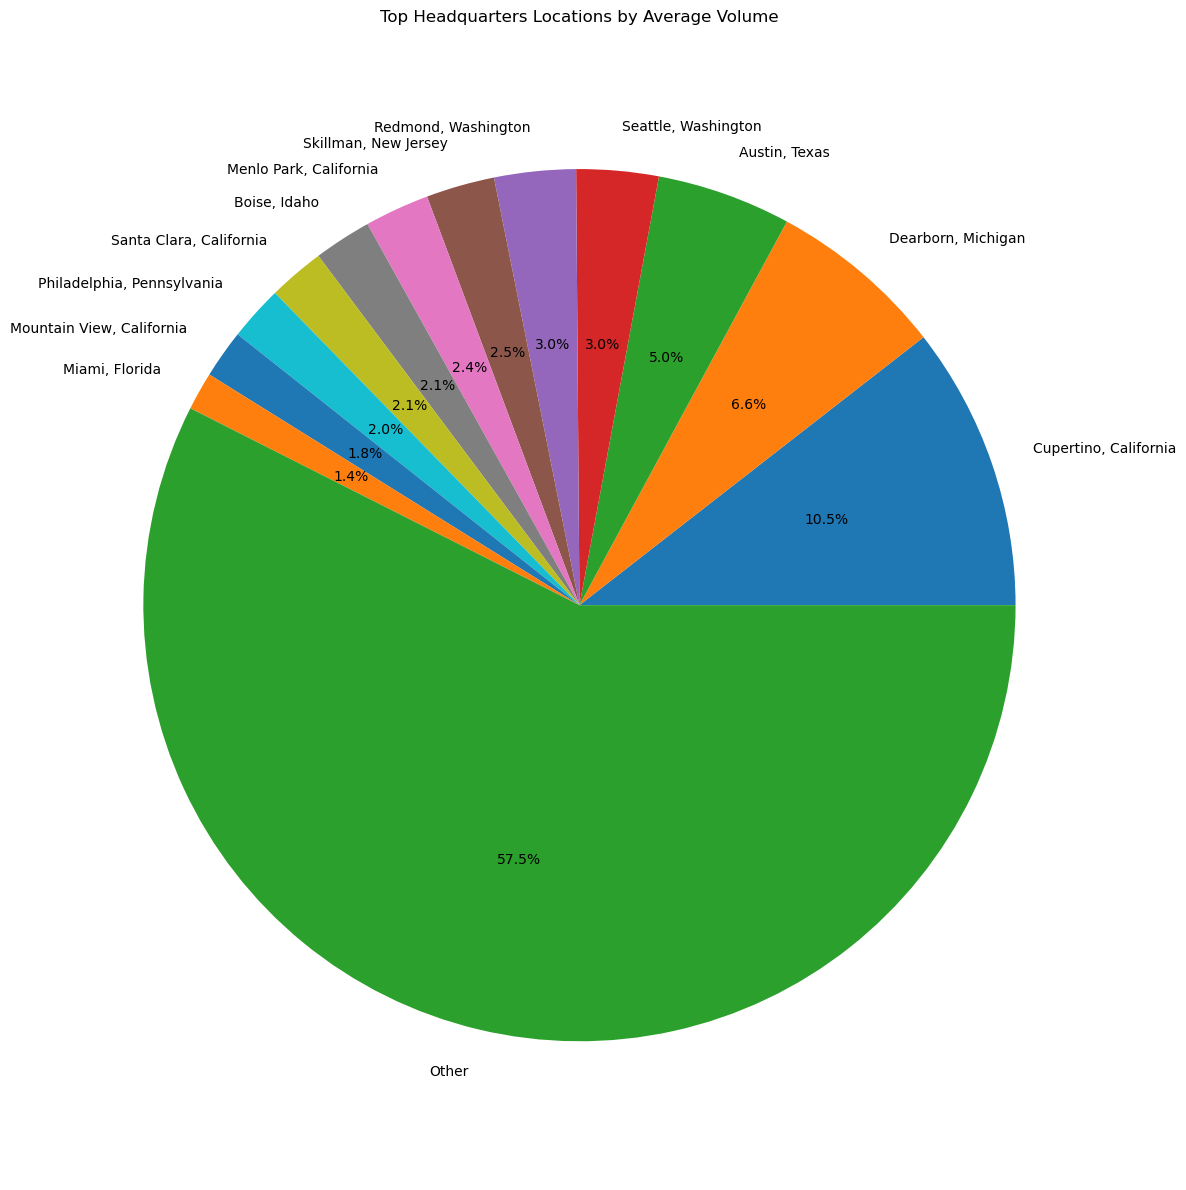

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('/Users/aringhorui/Documents/BDMS/Analysis8GeographicalAnalysis/part-00000-97459c26-e5b3-41c5-90e6-af361c32fe3b-c000.csv')

# Selecting the top 7 Headquarters_Location based on Average_Volume
top_locations = data.nlargest(12, 'Average_Volume')

# Calculate the total Average_Volume for the rest of the locations
other_volume = data[~data['Headquarters_Location'].isin(top_locations['Headquarters_Location'])]['Average_Volume'].sum()

# Create a list for top 7 locations and their corresponding volumes
top_location_list = list(top_locations['Headquarters_Location'])
top_volume_list = list(top_locations['Average_Volume'])

# Append 'Other' location and its volume to the lists
top_location_list.append('Other')
top_volume_list.append(other_volume)

# Plotting the pie chart
plt.figure(figsize=(12, 12))
plt.pie(top_volume_list, labels=top_location_list, autopct='%1.1f%%')
plt.title('Top Headquarters Locations by Average Volume')
plt.axis('equal') 
plt.tight_layout()
plt.show()


 <span style="font-size: 30px;">9.seasonality Analysis</span>

In [ ]:
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Sort the data based on the 'Date' column
data = data.sort_values('Date')

# Plotting the Average_Volume over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Average_Volume'], marker='o', linestyle='-')
plt.title('Average Volume over Time')
plt.xlabel('Date')
plt.ylabel('Average Volume')
plt.grid(True)
plt.tight_layout()
plt.show()